In [2]:
from torchvision import datasets
import numpy as np
import torch

#train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True)
#test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True)

In [3]:
from torchvision import transforms

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=False, transform=transforms.ToTensor())
mnist_transforms = transforms.Compose([transforms.ToTensor()])

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=False, transform=mnist_transforms)
train_val_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [4]:
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
len(train_dataset), len(val_dataset), len(test_dataset)

(54000, 6000, 10000)

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)

BATCH_SIZE_TEST  =64
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

# Let's see no of batches that we have now with the current batch-size
len(train_dataloader), len(val_dataloader), len(test_dataloader) 

(844, 94, 157)

In [247]:
from vit_pytorch import ViT  # ViT model

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_vit = ViT(
    image_size=28,       # MNIST images are 28x28
    patch_size=4,        # 4 patches per dimension (28/7)
    num_classes=10,      # 10 output classes for digits 0-9
    dim=64,             # Embedding dimension
    depth=6,             # Number of transformer layers
    heads=8,             # Number of attention heads
    mlp_dim=128,         # Hidden dimension in MLP layers
    dropout=0.1,         # Dropout rate in transformer
    emb_dropout=0.1,     # Dropout rate for embeddings
    channels = 1
).to(device)



from torch import nn

class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))
    

In [251]:
###Load Model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = " ViT_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


model_ViT_mnist_loaded = ViT(
    image_size=28,       # MNIST images are 28x28
    patch_size=4,        # 4 patches per dimension (28/7)
    num_classes=10,      # 10 output classes for digits 0-9
    dim=64,             # Embedding dimension
    depth=6,             # Number of transformer layers
    heads=8,             # Number of attention heads
    mlp_dim=128,         # Hidden dimension in MLP layers
    dropout=0.1,         # Dropout rate in transformer
    emb_dropout=0.1,     # Dropout rate for embeddings
    channels = 1
).to(device)


model_ViT_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "lenet5_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

lenet5_v1_mnist = LeNet5V1()
lenet5_v1_mnist.load_state_dict(torch.load(MODEL_SAVE_PATH))


C:\Users\Sven Jacob\AppData\Local\Temp\ipykernel_4412\1899611483.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ViT_mnist_loaded.load_state_dict(torch.load(MODEL

<All keys matched successfully>

In [82]:
from torch import nn

class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14
            
            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
        
    def forward(self, x):
        return self.classifier(self.feature(x))



MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "lenet5_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model
#print(f"Saving the model: {MODEL_SAVE_PATH}")
#torch.save(obj=model_lenet5v1.state_dict(), f=MODEL_SAVE_PATH)

# Loading the saved model
model_lenet5_v1_mnist_loaded = LeNet5V1()
model_lenet5_v1_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

C:\Users\jsve\AppData\Local\Temp\ipykernel_30740\3631358373.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_lenet5_v1_mnist_loaded.load_state_dict(torch.load(MODE

<All keys matched successfully>

In [252]:
from torchmetrics import Accuracy
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model_loaded = model_ViT_mnist_loaded
model_loaded = lenet5_v1_mnist
loss_fn = nn.CrossEntropyLoss()
accuracy = Accuracy(task='multiclass', num_classes=10).to(device)

test_loss, test_acc = 0, 0

model_loaded.to(device)

model_loaded.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model_loaded(X)
        
        test_loss += loss_fn(y_pred, y)
        test_acc += accuracy(y_pred, y)
        
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(f"Test loss: {test_loss: .5f}| Test acc: {test_acc: .5f}")

Test loss:  0.04878| Test acc:  0.98627


In [253]:
from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.torch.attacks.projected_gradient_descent import projected_gradient_descent

model_loaded.eval()
epsilons = [0.0001,0.0003,0.0005,0.001,0.005,0.01,0.05,0.1]
accuracies = []
#eps = 0.0005
REPORTS= []
for eps in epsilons:
    nb_missclassified_FGSM=0
    nb_missclassified_PGD=0

    REPORT = {'original':{'y':[],'x':[]},'attack_FGSM':{'y':[],'x':[]},'attack_PGD':{'y':[],'x':[]}}
    for x,y in test_dataloader:
        REPORT['original']['x'].append(x)
        x,y = x.to(device), y.to(device)
        x_fgm = fast_gradient_method(model_loaded,x,eps,np.inf)
        REPORT['attack_FGSM']['x'].append(x_fgm.detach().cpu())

        #x_pgd = projected_gradient_descent(model_loaded,x,eps, eps_iter=eps/10, nb_iter=20, norm=np.inf)
        #REPORT['attack_PGD']['x'].append(x_pgd.detach().cpu())


        _, y_pred = model_loaded(x).max(1)
        REPORT['original']['y'].append(y.detach().cpu())

        _, y_pred_fgm = model_loaded(x_fgm).max(1)
        REPORT['attack_FGSM']['y'].append(y_pred_fgm.detach().cpu())

        #_, y_pred_pgd = model_loaded(x_pgd).max(1)
        #REPORT['attack_PGD']['y'].append(y_pred_pgd.detach().cpu())



        nb_missclassified_FGSM+= torch.sum((y_pred_fgm == y_pred))
        #nb_missclassified_PGD+= torch.sum((y_pred_pgd == y_pred))

    REPORT['original']['y'] = torch.cat(REPORT['original']['y'],axis=0)
    REPORT['original']['x'] = torch.cat(REPORT['original']['x'],axis=0)

    REPORT['attack_FGSM']['y'] = torch.cat(REPORT['attack_FGSM']['y'],axis=0)
    REPORT['attack_FGSM']['x'] = torch.cat(REPORT['attack_FGSM']['x'],axis=0)

    #REPORT['attack_PGD']['y'] = torch.cat(REPORT['attack_PGD']['y'],axis=0)
    #REPORT['attack_PGD']['x'] = torch.cat(REPORT['attack_PGD']['x'],axis=0)
    acc_FGSM = nb_missclassified_FGSM.detach().cpu().numpy()/len(test_dataset)
    #acc_PGD = nb_missclassified_PGD.detach().cpu().numpy()/len(test_dataset)

    accuracies.append(acc_FGSM)
    print(eps,acc_FGSM)

    REPORTS.append(REPORT)

0.0001 0.9993
0.0003 0.9979
0.0005 0.9971
0.001 0.9957
0.005 0.9735
0.01 0.9397
0.05 0.6051
0.1 0.3487


Text(0.5, 1.0, 'Adv Attack ViT')

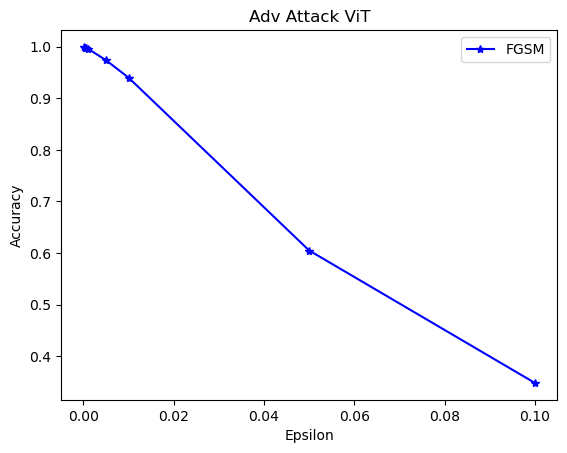

In [254]:
#accuracies_PGD = [0.9741,0.8492,0.7138,0.5486,0.6207,0.7236,0.796,0.7961]

plt.plot(epsilons,accuracies,label='FGSM',marker='*',color='blue')
#plt.plot(epsilons,accuracies_PGD,label='PGD',marker='*',color='red')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Adv Attack ViT')

In [226]:
epsilons

[0.0001, 0.0003, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

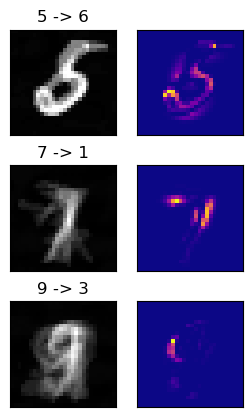

In [263]:
c1_list = [5,7,9]
c2_list = [6,1,3]

x_false = []
x_true =[]

eps_summary = 0.01

REPORT_plot = REPORTS[epsilons.index(eps_summary)]
### get index of c1 in original
#print(REPORT)
row = 0
fig,ax = plt.subplots(3,2,figsize=(3,5))
for c1,c2 in zip(c1_list,c2_list):
    #x_false = []
    #x_true =[]
    ind = REPORT_plot['original']['y'] == c1

    x_true = REPORT_plot['original']['x'][ind]
    ### get index in pertubed of c1 but with c2 predictions
    ind_wrong = REPORT_plot['attack_FGSM']['y'][ind] == c2
    ind_wrong
    x_false_FGSM = REPORT_plot['attack_FGSM']['x'][ind][ind_wrong]

    #ind_wrong = REPORT_plot['attack_PGD']['y'][ind] == c2
    #ind_wrong
    #x_false_PGD = REPORT_plot['attack_PGD']['x'][ind][ind_wrong]
    #print(len(x_false_PGD))
    #ax[0].imshow(x_true.mean(axis=0)[0,:,:].numpy())
    ax[row,0].imshow(x_false_FGSM.mean(axis=0)[0,:,:].numpy(),cmap='gray')
    ax[row,0].set_title(f"{c1} -> {c2}")
    ax[row,1].imshow(np.abs(x_true.mean(axis=0)[0,:,:].numpy()-x_false_FGSM.mean(axis=0)[0,:,:].numpy())**4,cmap='plasma')
    #ax[row,2].imshow(np.abs(x_true.mean(axis=0)[0,:,:].numpy()-x_false_PGD.mean(axis=0)[0,:,:].numpy())**4,cmap='plasma')
    ax[row,0].set_xticks([])
    ax[row,1].set_xticks([])
    ax[row,0].set_yticks([])
    ax[row,1].set_yticks([])
    row+=1



In [13]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

# restores the tensors to their original scale
def denorm(batch, mean=[0.0], std=[1]):
    """
    Convert a batch of tensors to their original scale.

    Args:
        batch (torch.Tensor): Batch of normalized tensors.
        mean (torch.Tensor or list): Mean used for normalization.
        std (torch.Tensor or list): Standard deviation used for normalization.

    Returns:
        torch.Tensor: batch of tensors without normalization applied to them.
    """
    if isinstance(mean, list):
        mean = torch.tensor(mean).to(device)
    if isinstance(std, list):
        std = torch.tensor(std).to(device)

    return batch * std.view(1, -1, 1, 1) + mean.view(1, -1, 1, 1)

In [25]:
import torch.nn.functional as F
loss_fn = nn.CrossEntropyLoss()


def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []
    examples_in_class  =[]
    # Loop over all examples in test set
    for data, target in test_loader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        model.eval()
        output = model(data)

        print(output.shape)
        print(output.max(1)[1])
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(init_pred)
        # If the initial prediction is wrong, don't bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        #loss = F.   nll_loss(output, target)
        loss = loss_fn(output,target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect ``datagrad``
        data_grad = data.grad.data

        # Restore the data to its original scale
        #data_denorm = denorm(data)

        # Call FGSM Attack
        #perturbed_data = fgsm_attack(data_denorm, epsilon, data_grad)
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Reapply normalization
        #perturbed_data_normalized = transforms.Normalize((0.0,), (1.0,))(perturbed_data)

        # Re-classify the perturbed image
        #output = model(perturbed_data_normalized)
        output = model(perturbed_data)
        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            examples_in_class.append((final_pred.item(),data.squeeze().detach().cpu().numpy()))
            # Special case for saving 0 epsilon examples
            # if epsilon == 0 and len(adv_examples) < 5:
            #     adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            #     adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            #if len(adv_examples) < 5:
            adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
            adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, data.squeeze().detach().cpu().numpy()) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print(f"Epsilon: {epsilon}\tTest Accuracy = {correct} / {len(test_loader)} = {final_acc}")

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples,examples_in_class

In [26]:
accuracies = []
examples = []


epsilons = [0.0005,0.001,0.0015,0.005]
examples_in_class =[]
# Run test for each epsilon
for eps in epsilons:
    acc, ex,ex_in_class = test(model_loaded, device, test_dataloader, eps)
    accuracies.append(acc)
    examples.append(ex)
    examples_in_class.append(ex_in_class)

torch.Size([64, 10])
tensor([9, 4, 9, 7, 5, 9, 4, 0, 5, 0, 3, 1, 2, 5, 2, 2, 5, 9, 4, 0, 9, 7, 3, 0,
        6, 0, 5, 1, 2, 8, 6, 9, 3, 8, 7, 4, 5, 2, 5, 2, 6, 1, 9, 7, 8, 6, 3, 4,
        7, 4, 1, 8, 8, 9, 4, 1, 5, 2, 8, 5, 4, 3, 6, 0], device='cuda:0')


RuntimeError: a Tensor with 64 elements cannot be converted to Scalar

In [24]:
torch.randn(10,5).max(axis=1)[1]

tensor([0, 0, 1, 4, 3, 1, 4, 2, 2, 2])

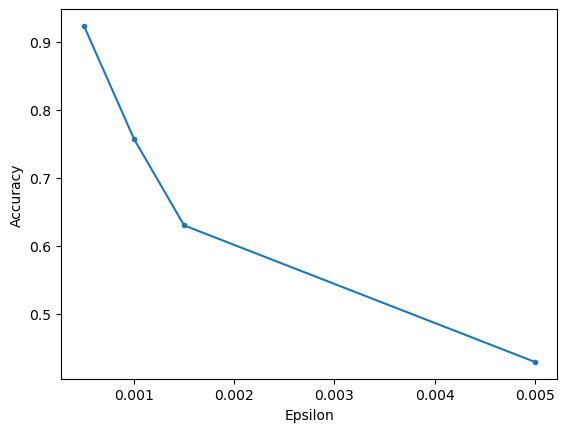

In [350]:
plt.plot(epsilons,accuracies,marker='.')
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [238]:
# import matplotlib.pyplot as plt

# c_init = 7
# c_final = 1

# ADV_Examples = {'eps1':[],'eps2':[],'eps3':[]}
# Examples_init ={'eps1':[],'eps2':[],'eps3':[]}

#     for adv,k in zip(examples[i]):
#         if c_init == adv[0] and c_final == adv[1]:
#             ADV_Examples.append(adv[2].flatten())
        
#     for sample in examples_in_class[0]:
#         if c_init == sample[0]:
#             Examples_init.append(sample[1].flatten())


In [ ]:
c_init = 5
c_final = 6
ADV_Examples = {'eps1':[],'eps2':[],'eps3':[]}
Examples_init ={'eps1':[],'eps2':[],'eps3':[]}


In [270]:
for ind,key in enumerate(ADV_Examples.keys()):
    for adv in examples[ind+1]:
        if c_init == adv[0] and c_final == adv[1]:
            ADV_Examples[key].append(adv[2].flatten())
    for sample in examples_in_class[ind+1]:
        if c_init == sample[0]:
            Examples_init[key].append(sample[1].flatten())

4

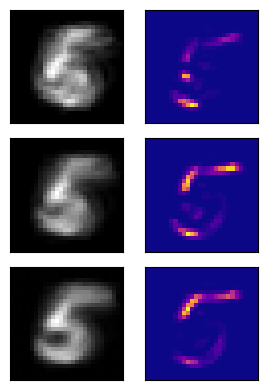

In [280]:
fig, ax = plt.subplots(3,2,figsize=(3,4))


col=0
for ind,key in enumerate(ADV_Examples.keys()):
    #ax[col,0].imshow(np.vstack(Examples_init[key]).mean(axis=0).reshape(28,28),cmap='gray')
    ax[col,0].imshow(np.vstack(ADV_Examples[key]).mean(axis=0).reshape(28,28),cmap='gray')
    ax[col,1].imshow(np.abs(np.vstack(Examples_init[key]).mean(axis=0).reshape(28,28)-np.vstack(ADV_Examples[key]).mean(axis=0).reshape(28,28))**4
                     ,cmap='plasma')
    #ax[col,2].imshow(np.abs(np.vstack(Examples_init[key]).mean(axis=0).reshape(28,28)-np.vstack(ADV_Examples[key]).mean(axis=0).reshape(28,28))**4
       #              ,cmap='plasma')
    col+=1


for axes in ax:
    for a in axes:
        a.set_xticks([])
        a.set_yticks([])
fig.tight_layout()

In [ ]:
ADV_Examples = {k:[] for k in epsilons}
Examples_init = {k:[] for k in epsilons}


{0.0005: [], 0.001: [], 0.0015: [], 0.005: []}

In [298]:
ADV_Examples

{0.0005: [], 0.001: [], 0.0015: [], 0.005: []}

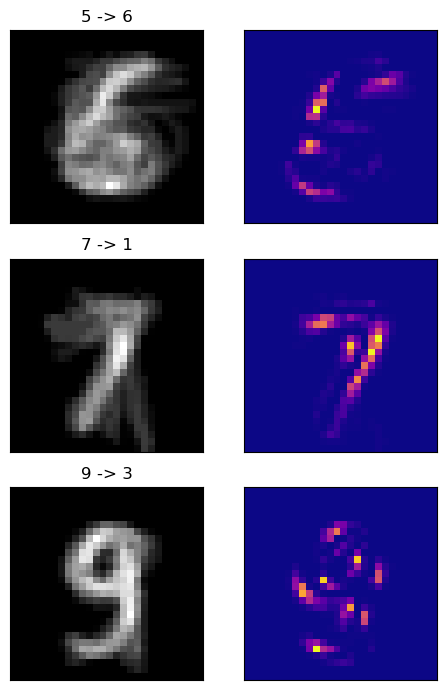

In [341]:
c_init = [5,7,9]
c_final = [6,1,3]

out_adv_list = []
out_non_adv_list=[]


for c1,c2 in zip(c_init,c_final):
    #print(c1,c2)
    ADV_Examples = {k:[] for k in epsilons}
    Examples_init = {k:[] for k in epsilons}
    for ind,key in enumerate(ADV_Examples.keys()):
        #print(key)
        for adv in examples[ind]:
            #print(1)
            if c1 == adv[0] and c2 == adv[1]:
                #print(1)
                ADV_Examples[key].append(adv[2].flatten())
        for sample in examples_in_class[ind]:
            if c1 == sample[0]:
                Examples_init[key].append(sample[1].flatten())
    out_adv_list.append(ADV_Examples)
    out_non_adv_list.append(Examples_init)


fig, ax = plt.subplots(3,2,figsize=(5,7))
row=0

key = 0.0005

for dict_adv, dict_non_adv in zip(out_adv_list,out_non_adv_list):
    ax[row,0].imshow(np.vstack(dict_adv[key]).mean(axis=0).reshape(28,28),cmap='gray')
    ax[row,0].set_title(f"{c_init[row]} -> {c_final[row]}")
    ax[row,1].imshow(np.abs(np.vstack(dict_non_adv[key]).mean(axis=0).reshape(28,28)-np.vstack(dict_adv[key]).mean(axis=0).reshape(28,28))**4
                     ,cmap='plasma')
    row+=1


for axes in ax:
    for a in axes:
        a.set_xticks([])
        a.set_yticks([])
fig.tight_layout()

In [342]:
fig.savefig("Adversarial_Examples_VIT_MNIST.pdf")

4

In [301]:
out_adv_list

[{0.0005: [array([5.0000002e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          0.0000000e+00, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00, 5.0000002e-04, 0.0000000e+00,
          0.0000000e+00, 5.0000002e-04, 5.0000002e-04, 5.0000002e-04,
          5.0000002e-04, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          0.0000000e+00, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 0.0000000e+00, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 5.0000002e-04, 0.0000000e+00,
          5.0000002e-04, 5.0000002e-04, 0.0000000e+00, 0.0000000e+00,
          0.

{0.0005: [], 0.001: [], 0.0015: [], 0.005: []}